In [1]:
import pandas as pd

In [2]:
train_df = pd.read_csv("train.csv")

In [3]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [4]:
train_df.shape

(404290, 6)

In [5]:
train_df.isna().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [6]:
train_df.dropna(inplace=True)

In [7]:
train_df.isna().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [8]:
train_df['is_duplicate'].value_counts()

0    255024
1    149263
Name: is_duplicate, dtype: int64

In [9]:
#63.07% data is not duplicated

### Adding new columns

> length of 2 question 

> no of words

> no of common words

> total words

> word share = word common/total words

In [10]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [11]:
def length(question):
    return len(question)

train_df['q1_length'] = train_df['question1'].apply(length)
train_df['q2_length'] = train_df['question2'].apply(length)

In [12]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39


In [13]:
def words(question):
    question = question.split()
    return len(question)

train_df['q1_words'] = train_df['question1'].apply(words)
train_df['q2_words'] = train_df['question2'].apply(words)

In [14]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_words,q2_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7


In [15]:
def common(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1 & w2) #intersection of 2 sets

train_df['common_words'] = train_df.apply(common, axis=1)

In [16]:
train_df['common_words']

0         10
1          4
2          4
3          0
4          2
          ..
404285    11
404286     5
404287     1
404288     1
404289     8
Name: common_words, Length: 404287, dtype: int64

In [17]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_words,q2_words,common_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2


In [18]:
train_df[train_df['id']==398782]

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_words,q2_words,common_words
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11


In [19]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))
    return len(w1) + len(w2)

train_df['total_words'] = train_df.apply(total_words, axis=1)

In [20]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_words,q2_words,common_words,total_words
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,19
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20


In [21]:
def word_share(row):
    return row['common_words']/row['total_words']

train_df['word_share'] = train_df.apply(word_share, axis=1)

In [22]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_words,q2_words,common_words,total_words,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,19,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20,0.100000


In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

minimum characters 1
maximum characters 623
average num of characters 59


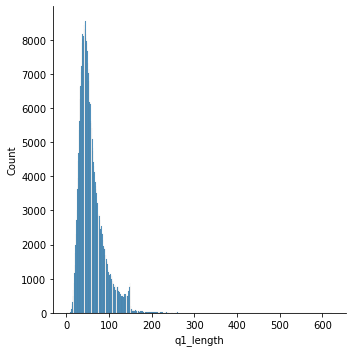

In [24]:
sns.displot(train_df['q1_length'])
print('minimum characters',train_df['q1_length'].min())
print('maximum characters',train_df['q1_length'].max())
print('average num of characters',int(train_df['q1_length'].mean()))

minimum characters 1
maximum characters 1169
average num of characters 60


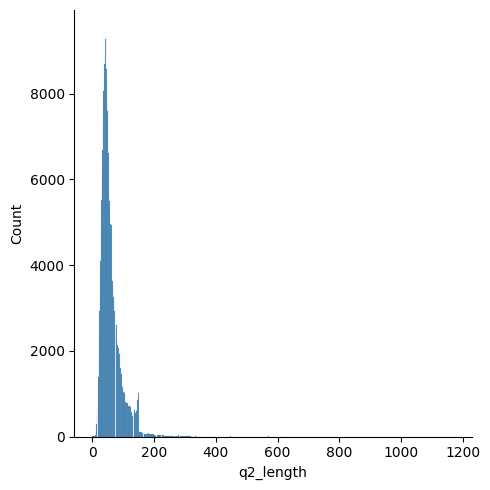

In [25]:
sns.displot(train_df['q2_length'])
print('minimum characters',train_df['q2_length'].min())
print('maximum characters',train_df['q2_length'].max())
print('average num of characters',int(train_df['q2_length'].mean()))

minimum characters 1
maximum characters 125
average num of characters 10


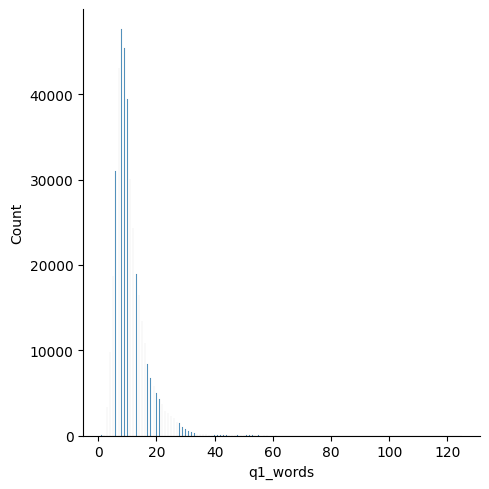

In [26]:
sns.displot(train_df['q1_words'])
print('minimum characters',train_df['q1_words'].min())
print('maximum characters',train_df['q1_words'].max())
print('average num of characters',int(train_df['q1_words'].mean()))

minimum characters 1
maximum characters 237
average num of characters 11


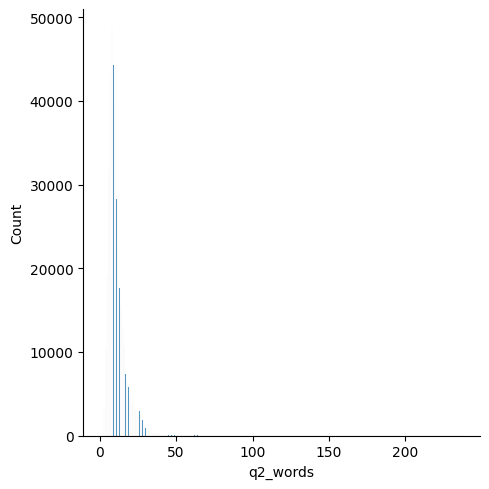

In [27]:
sns.displot(train_df['q2_words'])
print('minimum characters',train_df['q2_words'].min())
print('maximum characters',train_df['q2_words'].max())
print('average num of characters',int(train_df['q2_words'].mean()))

c:\Users\patil\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\patil\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


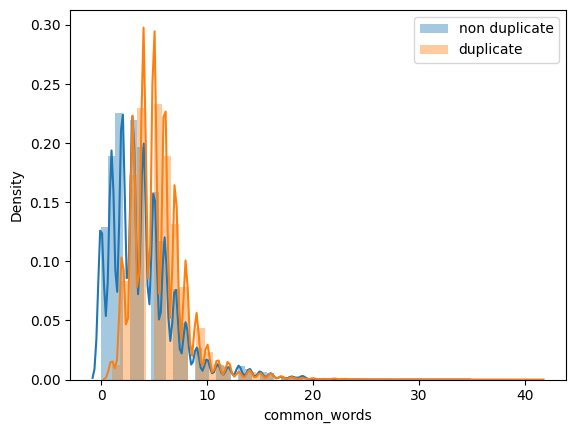

In [28]:
sns.distplot(train_df[train_df['is_duplicate'] == 0]['common_words'],label='non duplicate')
sns.distplot(train_df[train_df['is_duplicate'] == 1]['common_words'],label='duplicate')
plt.legend()
plt.show()

If number of common words are greater than 4 then it is likely to be a duplicate question

c:\Users\patil\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\patil\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


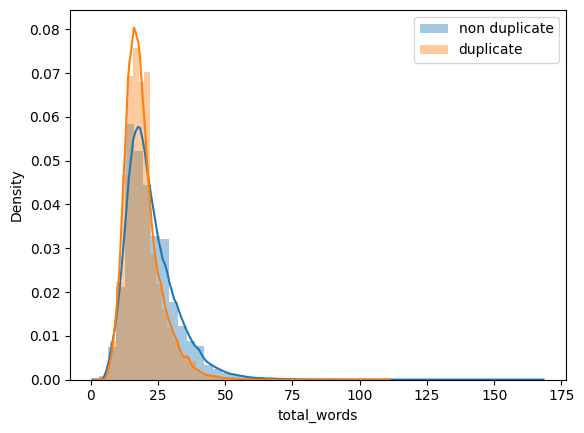

In [29]:
sns.distplot(train_df[train_df['is_duplicate'] == 0]['total_words'],label='non duplicate')
sns.distplot(train_df[train_df['is_duplicate'] == 1]['total_words'],label='duplicate')
plt.legend()
plt.show()

If number of words are between 0-12 then it is likely to be duplicate

c:\Users\patil\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\Users\patil\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


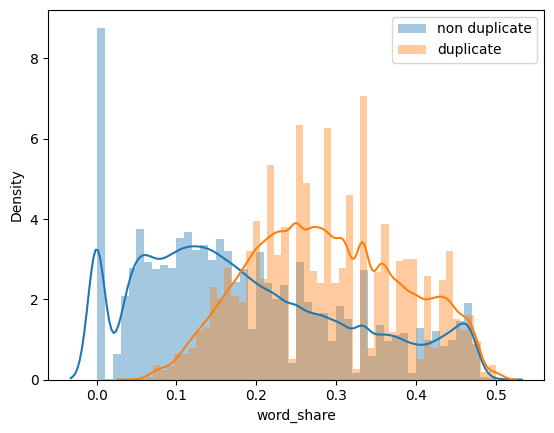

In [30]:
sns.distplot(train_df[train_df['is_duplicate'] == 0]['word_share'],label='non duplicate')
sns.distplot(train_df[train_df['is_duplicate'] == 1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [31]:
train_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_length,q2_length,q1_words,q2_words,common_words,total_words,word_share
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,66,57,14,12,10,23,0.434783
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,51,88,8,13,4,20,0.200000
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,73,59,14,10,4,24,0.166667
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,50,65,11,9,0,19,0.000000
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,76,39,13,7,2,20,0.100000


If word share is greater than 0.2 then it is likely to be duplicate

In [32]:
sample = train_df.sample(30000)

In [33]:
questions_df = sample[['question1', 'question2']]

In [34]:
questions_df.head()

,question1,question2
60775,What are the some of the best books on Diplomacy?,What are some of the best books about diplomacy?
24394,What is the truth behind withdrawal of 1000 an...,What is the main reason behind abolishing Rs 5...
312811,What do pixate developers think about Framer.js?,I am Java developer who wants to learn Node.js...
144435,Have you ever met a celebrity who was nicer th...,Who's the nicest celebrity you've ever met?
14005,Are the cross rifles only for army infantry?,Can only the Infantry join Airborne units?


In [35]:
questions_df.shape

(30000, 2)

In [36]:
final_df = sample.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_length,q2_length,q1_words,q2_words,common_words,total_words,word_share
60775,1,49,48,10,9,8,18,0.444444
24394,1,70,76,14,15,11,28,0.392857
312811,0,48,95,7,18,0,22,0.000000
144435,1,62,43,12,7,2,18,0.111111
14005,0,44,42,8,7,2,15,0.133333


In [37]:
import numpy as np

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=4000, stop_words='english')
questions = list(questions_df['question1']) + list(questions_df['question2']) #combine the question column
q1_arr, q2_arr = np.vsplit(tfidf.fit_transform(questions).toarray(),2) #dividing the question column

In [52]:
len(questions)

60000

In [53]:
q1_arr = q1_arr.astype(dtype='float32')
q2_arr = q2_arr.astype(dtype='float32')

In [54]:
ques1 = pd.DataFrame(q1_arr, index= questions_df.index)

In [55]:
ques1

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
60775,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24394,0.0,0.0,0.0,0.378551,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
312811,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144435,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14005,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249597,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380748,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30952,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186817,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
ques2 = pd.DataFrame(q2_arr, index= questions_df.index)

In [57]:
ques2

,0,1,2,3,4,5,6,7,8,9,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
60775,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24394,0.0,0.0,0.0,0.264595,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
312811,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144435,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14005,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249597,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
380748,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
30952,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
186817,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
temp_df = pd.concat([ques1, ques2], axis=1)

In [59]:
temp_df.shape

(30000, 8000)

In [60]:
final_df = pd.concat([final_df, temp_df], axis=1)
print(final_df.shape)
final_df.head()

(30000, 14008)


,is_duplicate,q1_length,q2_length,q1_words,q2_words,common_words,total_words,word_share,0,1,...,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999
60775,1,49,48,10,9,8,18,0.444444,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24394,1,70,76,14,15,11,28,0.392857,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
312811,0,48,95,7,18,0,22,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
144435,1,62,43,12,7,2,18,0.111111,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14005,0,44,42,8,7,2,15,0.133333,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [61]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.3,random_state=1)

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7576666666666667

In [63]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7542222222222222